**Source 1 : https://www.kaggle.com/datasets/towhidultonmoy/russia-vs-ukraine-tweets-datasetdaily-updated/**

**Source 2 : https://thecleverprogrammer.com/2022/03/15/ukraine-russia-war-twitter-sentiment-analysis-using-python/**

There are a lot of tweets about the Ukraine and Russia war where people tend to update about the ground truths, what they feel about it, and who they are supporting. We will analyze the sentiments of people over the Ukraine and Russian War.

In [1]:
# Import the necessary Python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

C:\Users\Suraj\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
##Load the dataset
data=pd.read_csv("filename.csv")

In [3]:
print(data.head())

                    id      conversation_id               created_at  \
0  1630366235354451969  1630152070530576385  2023-02-28 00:36:15 UTC   
1  1630366226424778753  1630366226424778753  2023-02-28 00:36:13 UTC   
2  1630366225930027011  1630366225930027011  2023-02-28 00:36:13 UTC   
3  1630366223056662530  1630351686974992385  2023-02-28 00:36:12 UTC   
4  1630366221483884545  1629903982255644672  2023-02-28 00:36:12 UTC   

         date      time  timezone              user_id     username  \
0  2023-02-28  00:36:15         0  1493761817406894086  tomasliptai   
1  2023-02-28  00:36:13         0  1526694166662721536  paperfloure   
2  2023-02-28  00:36:13         0  1053018392939167746    katetbar1   
3  2023-02-28  00:36:12         0            602371247    jlhrdhmom   
4  2023-02-28  00:36:12         0  1053594763214184448    phemikali   

                  name place  ... geo source user_rt_id user_rt retweet_id  \
0         Tomas Liptai   NaN  ... NaN    NaN        NaN     Na

In [4]:
#check all the columns
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


Here We need only 3 columns for this task. ('username','tweeet,'language'). Lets proceed with selecting these columns.

In [5]:
df=data[["username","tweet","language"]]

In [6]:
##Lets check the null values
df.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

No null values present in the dataset.

In [7]:
##Lets check how many tweets are prosted in which language
df.language.value_counts()

en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
qht      20
ca       20
th       19
fr       18
de       14
ko        9
nl        8
vi        8
fi        7
ro        7
cs        6
uk        6
zxx       6
ar        6
pl        5
zh        5
qam       4
tl        4
da        3
tr        2
no        2
eu        2
hi        2
el        1
cy        1
hu        1
bn        1
lv        1
Name: language, dtype: int64

Here as we can see most of the tweets are from English language.
Lets prepare the data for the task by removing all the punctuations, links, symbols and other language errors.

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stemmer = nltk.SnowballStemmer('english')

In [10]:
stopword=set(stopwords.words('english'))

In [11]:
#Lets define a function which clean the data
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]', '', text)
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub('\n','', text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
    

In [12]:
##now lets apply function to clean the tweets
df["tweet"]=df["tweet"].apply(clean)

<ipython-input-12-4bda7beb7d5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet"]=df["tweet"].apply(clean)


**let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the war.**

In [13]:
text=" ".join(i for i in df.tweet)

In [14]:
stopwords=set(STOPWORDS)

In [15]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


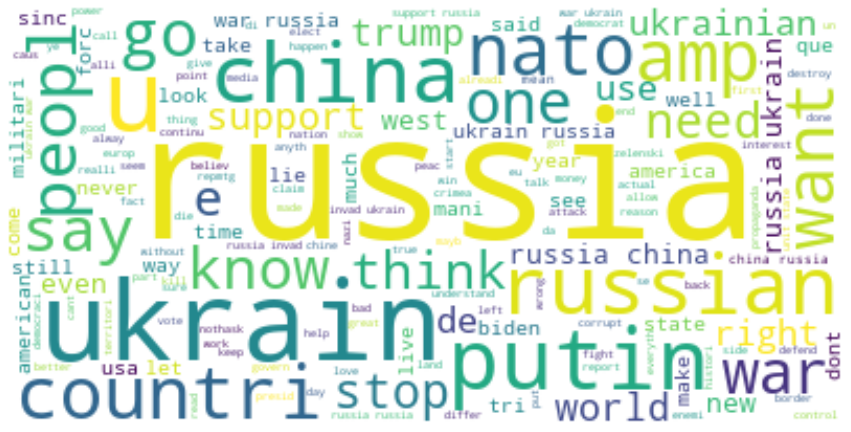

In [16]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Lets add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets.

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
sentiments=SentimentIntensityAnalyzer()

In [19]:
df["Positive"]=[sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
df["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
df["Neutral"]=[sentiments.polarity_scores(i)["neu"] for i in df["tweet"]]
df=df[["tweet","Positive","Negative","Neutral"]]

<ipython-input-19-e2e44a6dcb81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Positive"]=[sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
<ipython-input-19-e2e44a6dcb81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
<ipython-input-19-e2e44a6dcb81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [20]:
print(df.head())

                                               tweet  Positive  Negative  \
0      nazijaeg derwen  russia place satan rule well     0.259     0.000   
1  russia haarp could destroy usa one fell swoop ...     0.000     0.280   
2       putin give steven seagal  order friendship       0.367     0.000   
3       mainelif baddcompani it alway project russia     0.000     0.000   
4  pottingpink mfarussia modrussia milhistrf muze...     0.068     0.078   

   Neutral  
0    0.741  
1    0.720  
2    0.633  
3    1.000  
4    0.854  


## Lets have a look at the most frequent words used by people with positive sentiments

In [21]:
positive=' '.join([i for i in df["tweet"][df["Positive"]>df["Negative"]]])

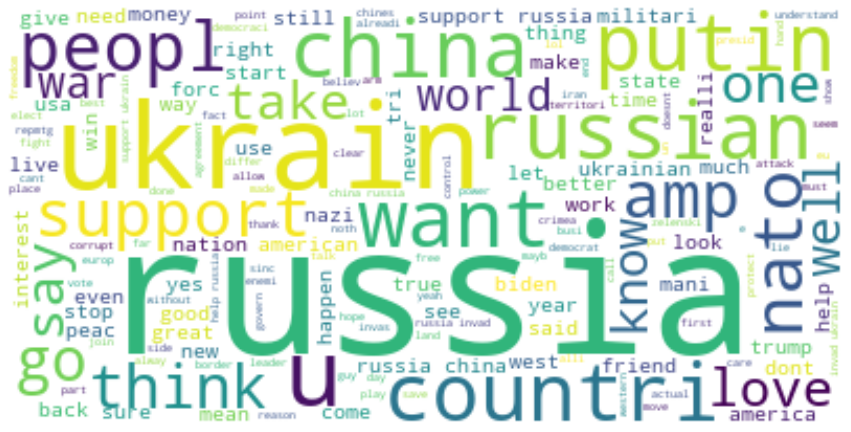

In [22]:
stopwords=set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## let’s have a look at the most frequent words used by people with negative sentiments:

In [23]:
negative=' '.join([i for i in df["tweet"][df["Negative"]>df["Positive"]]])

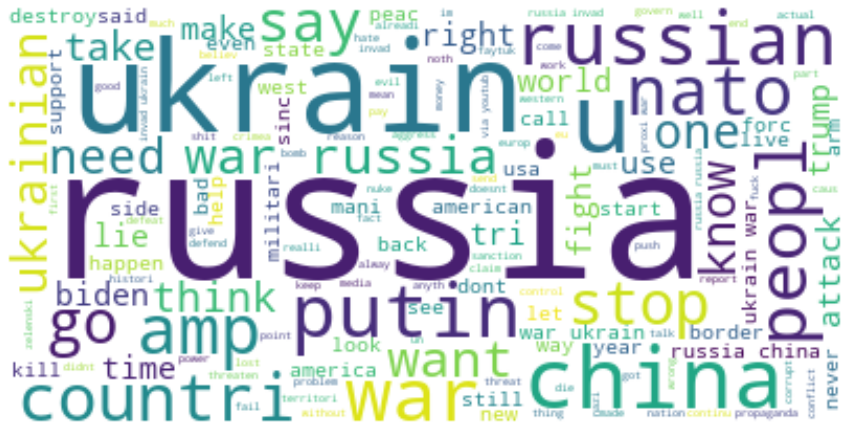

In [24]:
stopwords=set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**There are a lot of tweets about the Ukraine and Russia war where people tend to update about the ground truths, what they feel about it, and who they are supporting. We used those tweets for the task of Twitter sentiment analysis on the Ukraine and Russia war.**